Section 1

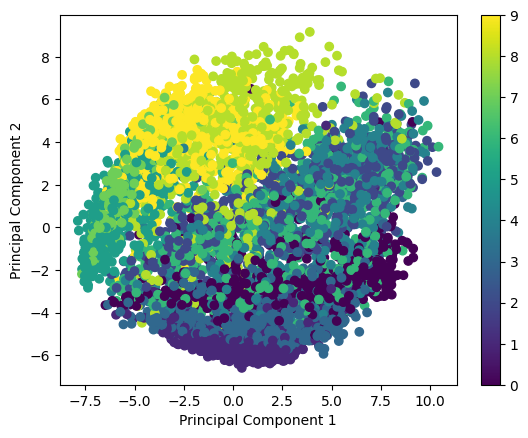

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

# Load the FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=int(len(trainset)/10), shuffle=False)

# Extract the data and labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Flatten the images
n_samples = len(images)
data = images.view(n_samples, -1).numpy()

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Plot the first two principal components
fig=plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


[]

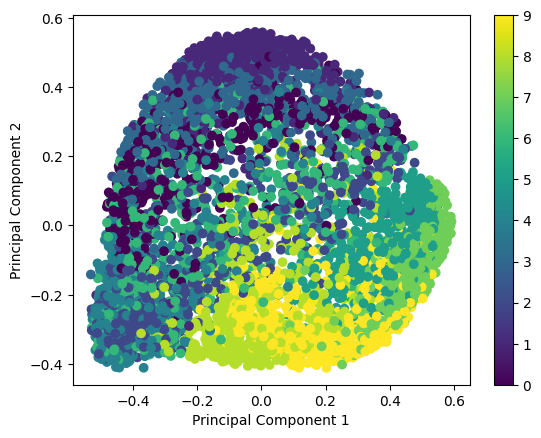

In [21]:
# Plot the first two principal components

k_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
kpc = k_pca.fit_transform(data)
fig=plt.figure()
plt.scatter(kpc[:, 0], kpc[:, 1], c=labels)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot()


[]

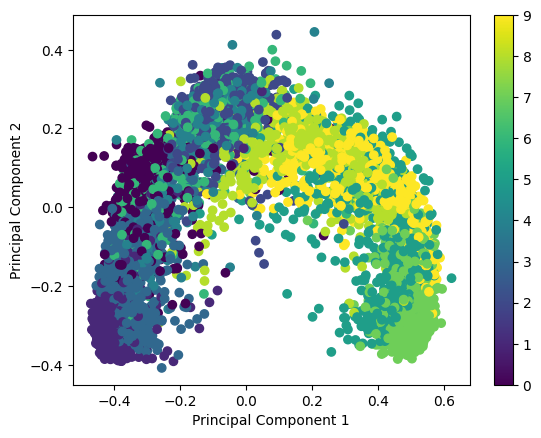

In [22]:
# Plot the first two principal components

k_pca = KernelPCA(n_components=2, kernel='cosine')
kpc = k_pca.fit_transform(data)
fig=plt.figure()
plt.scatter(kpc[:, 0], kpc[:, 1], c=labels)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot()

Section 2

In [ ]:
from sklearn.cluster import KMeans
k_pca = KernelPCA(n_components=10, kernel='rbf', gamma=0.01)
kpc = k_pca.fit_transform(data)

[[1.         0.30755276]
 [0.30755276 1.        ]]


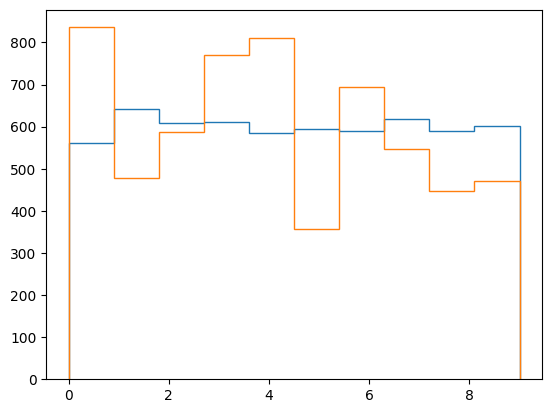

In [ ]:
import numpy as np 
kmeans = KMeans(n_clusters=10, random_state=0).fit(kpc)
c_labels=kmeans.labels_
plt.hist(labels, histtype='step')
plt.hist(c_labels, histtype='step')
plt.plot()

[[1.         0.30755276]
 [0.30755276 1.        ]]


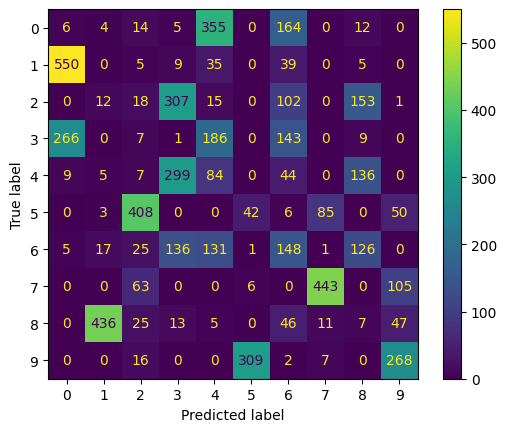

In [ ]:
from sklearn import metrics
print(np.corrcoef(labels, c_labels))
confusion_matrix = metrics.confusion_matrix(labels, c_labels)
metrics.ConfusionMatrixDisplay(confusion_matrix).plot()
plt.show()

The optimal number of clusters is: 3


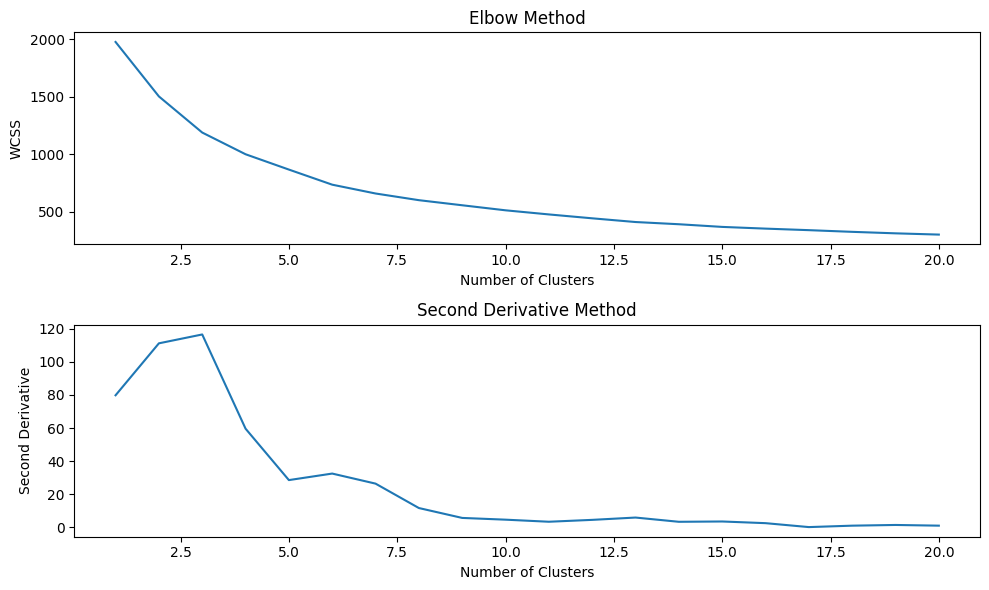

In [ ]:

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(kpc)
    wcss.append(kmeans.inertia_)

# Calculate the second derivative
second_derivative = np.gradient(np.gradient(wcss))

# Find the index of the maximum second derivative
knee_index = np.argmax(second_derivative) + 1  # Add 1 to account for indexing

print("The optimal number of clusters is:", knee_index)

# Plot the WCSS and second derivative
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(range(1, 21), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")

plt.subplot(2, 1, 2)
plt.plot(range(1, 21), second_derivative)
plt.xlabel("Number of Clusters")
plt.ylabel("Second Derivative")
plt.title("Second Derivative Method")

plt.tight_layout()
plt.show()